In [142]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [143]:
df = pd.read_csv('2018_2019_24-59mos_overweight_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'overweight'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,overweight
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,0
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,0
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,0


# FINAL FEATURES

In [144]:
final_data = df[["bw_grams","psoc_hh","wcooking","age_hh","psccat_mom","occup_mom","drinkingwater","overweight"]]

In [145]:
final_data.head()

,bw_grams,psoc_hh,wcooking,age_hh,psccat_mom,occup_mom,drinkingwater,overweight
0,2400,6,2,37,0,10,0,0
1,2500,99,2,54,2,10,1,0
2,2500,6,2,38,0,5,0,0
3,3200,6,2,36,0,5,0,0
4,2800,8,2,44,0,10,1,0


In [146]:
final_data.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'age_hh', 'psccat_mom', 'occup_mom',
       'drinkingwater', 'overweight'],
      dtype='object')

In [147]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502 entries, 0 to 14501
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   bw_grams       14502 non-null  int64
 1   psoc_hh        14502 non-null  int64
 2   wcooking       14502 non-null  int64
 3   age_hh         14502 non-null  int64
 4   psccat_mom     14502 non-null  int64
 5   occup_mom      14502 non-null  int64
 6   drinkingwater  14502 non-null  int64
 7   overweight     14502 non-null  int64
dtypes: int64(8)
memory usage: 906.5 KB


In [148]:
 display("Total number of of Duplicates present in data: %s" %final_data.duplicated().sum())


'Total number of of Duplicates present in data: 410'

In [149]:
final_data = final_data.drop_duplicates()

In [150]:
display("Total number of of Duplicates present in data: %s" %final_data.duplicated().sum())


'Total number of of Duplicates present in data: 0'

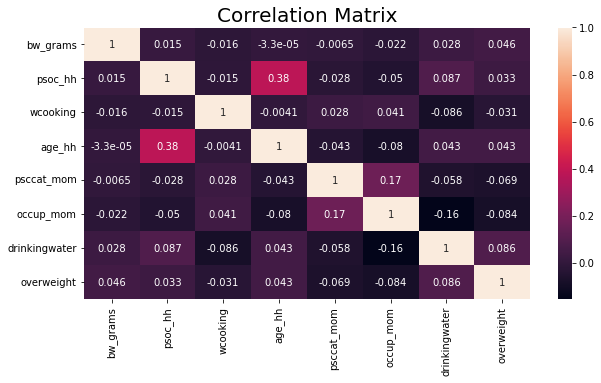

In [151]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(final_data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

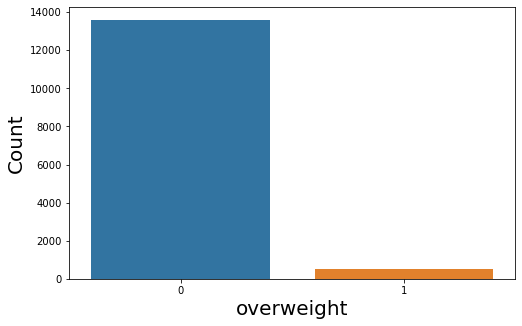

In [152]:
overweight_label = final_data.overweight.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(overweight_label.index, overweight_label);
plt.xlabel('overweight', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [153]:
final_data['overweight'].value_counts()

0    13589
1      503
Name: overweight, dtype: int64

In [154]:
Final = final_data[["bw_grams","psoc_hh","wcooking","age_hh",
                    "psccat_mom"]]
Target =final_data['overweight']

In [155]:
Final.head()

,bw_grams,psoc_hh,wcooking,age_hh,psccat_mom
0,2400,6,2,37,0
1,2500,99,2,54,2
2,2500,6,2,38,0
3,3200,6,2,36,0
4,2800,8,2,44,0


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [157]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.964
Accuracy score : 0.9659453706988294


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.993
Accuracy score:  0.9609790705924086


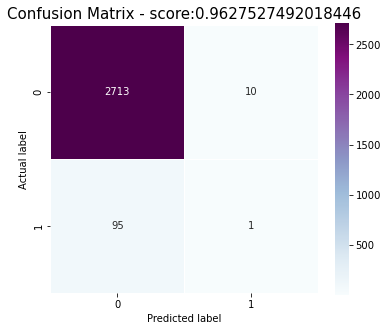

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2723
           1       0.09      0.01      0.02        96

    accuracy                           0.96      2819
   macro avg       0.53      0.50      0.50      2819
weighted avg       0.94      0.96      0.95      2819



In [159]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [160]:
final_data['overweight'].value_counts()

0    13589
1      503
Name: overweight, dtype: int64

In [161]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = final_data[final_data.overweight==0]
df_2 = final_data[final_data.overweight==1]
 
# Upsample minority class
df_2_upsampled2 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=13589,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled6 = pd.concat([df_1, df_2_upsampled2])
 
# Display new class counts
df_upsampled6.overweight.value_counts()
df_upsampled6.reset_index(drop=True)

,bw_grams,psoc_hh,wcooking,age_hh,psccat_mom,occup_mom,drinkingwater,overweight
0,2400,6,2,37,0,10,0,0
1,2500,99,2,54,2,10,1,0
2,2500,6,2,38,0,5,0,0
3,3200,6,2,36,0,5,0,0
4,2800,8,2,44,0,10,1,0
...,...,...,...,...,...,...,...,...
27173,2500,5,1,34,0,10,1,1
27174,2800,6,2,70,0,2,1,1
27175,2750,99,11,31,0,10,1,1
27176,2200,9,1,61,2,10,1,1


In [162]:
df_upsampled6.head()

,bw_grams,psoc_hh,wcooking,age_hh,psccat_mom,occup_mom,drinkingwater,overweight
0,2400,6,2,37,0,10,0,0
1,2500,99,2,54,2,10,1,0
2,2500,6,2,38,0,5,0,0
3,3200,6,2,36,0,5,0,0
4,2800,8,2,44,0,10,1,0


C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

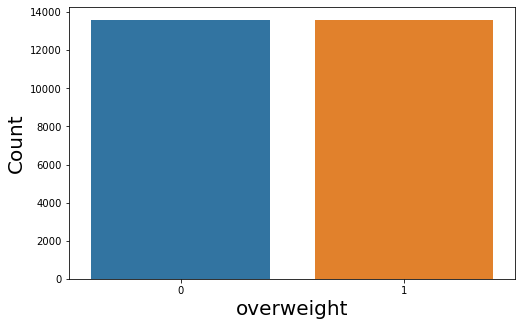

In [163]:
overweight_label = df_upsampled6.overweight.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(overweight_label.index, overweight_label);
plt.xlabel('overweight', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [164]:
df_upsampled6.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'age_hh', 'psccat_mom', 'occup_mom',
       'drinkingwater', 'overweight'],
      dtype='object')

In [165]:
Final = df_upsampled6[["bw_grams","psoc_hh","wcooking","age_hh",
                    "psccat_mom"]]
Target =df_upsampled6['overweight']

In [166]:
Final.head()

,bw_grams,psoc_hh,wcooking,age_hh,psccat_mom
0,2400,6,2,37,0
1,2500,99,2,54,2
2,2500,6,2,38,0
3,3200,6,2,36,0
4,2800,8,2,44,0


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [168]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.614
Accuracy score : 0.6116629874908021


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



Training score: 0.997
Accuracy score:  0.9847314201618838


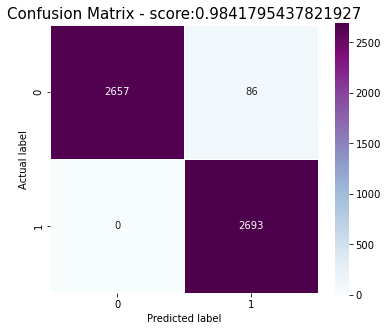

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2743
           1       0.97      1.00      0.98      2693

    accuracy                           0.98      5436
   macro avg       0.98      0.98      0.98      5436
weighted avg       0.98      0.98      0.98      5436



In [170]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [171]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.991
Test score: 0.975


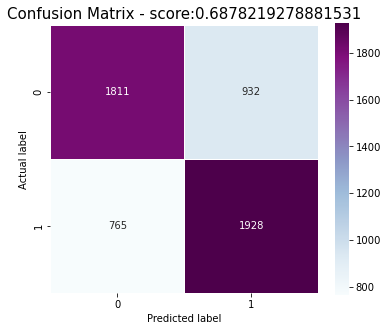

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2743
           1       0.67      0.72      0.69      2693

    accuracy                           0.69      5436
   macro avg       0.69      0.69      0.69      5436
weighted avg       0.69      0.69      0.69      5436



In [172]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

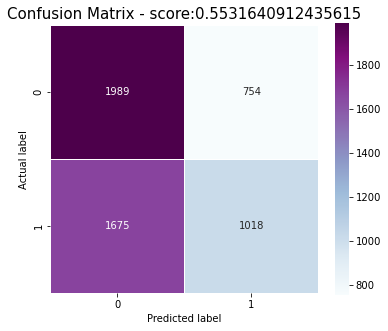

              precision    recall  f1-score   support

           0       0.54      0.73      0.62      2743
           1       0.57      0.38      0.46      2693

    accuracy                           0.55      5436
   macro avg       0.56      0.55      0.54      5436
weighted avg       0.56      0.55      0.54      5436



In [173]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


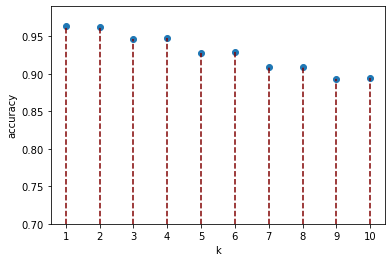

In [174]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

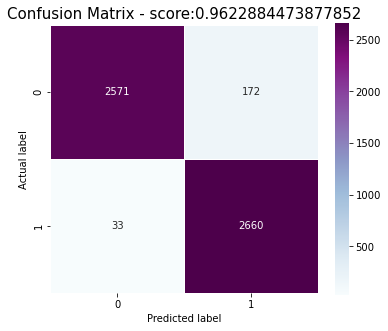

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2743
           1       0.94      0.99      0.96      2693

    accuracy                           0.96      5436
   macro avg       0.96      0.96      0.96      5436
weighted avg       0.96      0.96      0.96      5436



In [175]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [176]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.9492227026032564
Testing accuracy =  0.9269683590875644


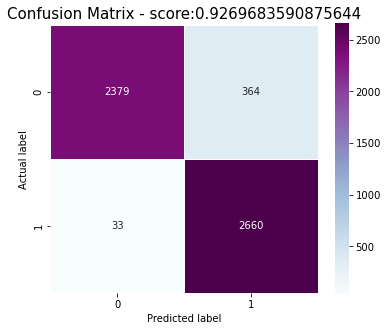

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2743
           1       0.88      0.99      0.93      2693

    accuracy                           0.93      5436
   macro avg       0.93      0.93      0.93      5436
weighted avg       0.93      0.93      0.93      5436



0.9269683590875644

In [177]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [178]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.5959433354797167
Testing accuracy =  0.5927152317880795


0.5927152317880795

In [179]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6435720185154827 0.9957617533419638 0.99625654824846 0.99625654824846 0.976952778154947 0.6372573254352063


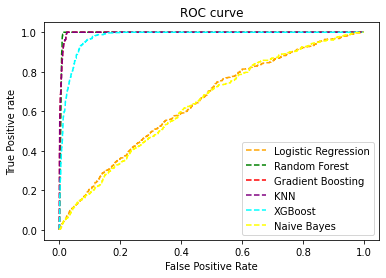

In [180]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [181]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Extreme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_acc,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [182]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.611663
1,Random Forest Classifier,0.984180
2,Gradient Boosting Classifier,0.687822
3,SVC,0.553164
4,KNierest Neighbor,0.962288
5,Extreme Gradient Boosting,0.926968
6,Naive Bayes Classifier,0.592715


# # with open('overweight_rf_random_state=0.pkl','wb') as file:
    pickle.dump(rf_model,file)

In [183]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [184]:
df_upsampled6.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'age_hh', 'psccat_mom', 'occup_mom',
       'drinkingwater', 'overweight'],
      dtype='object')

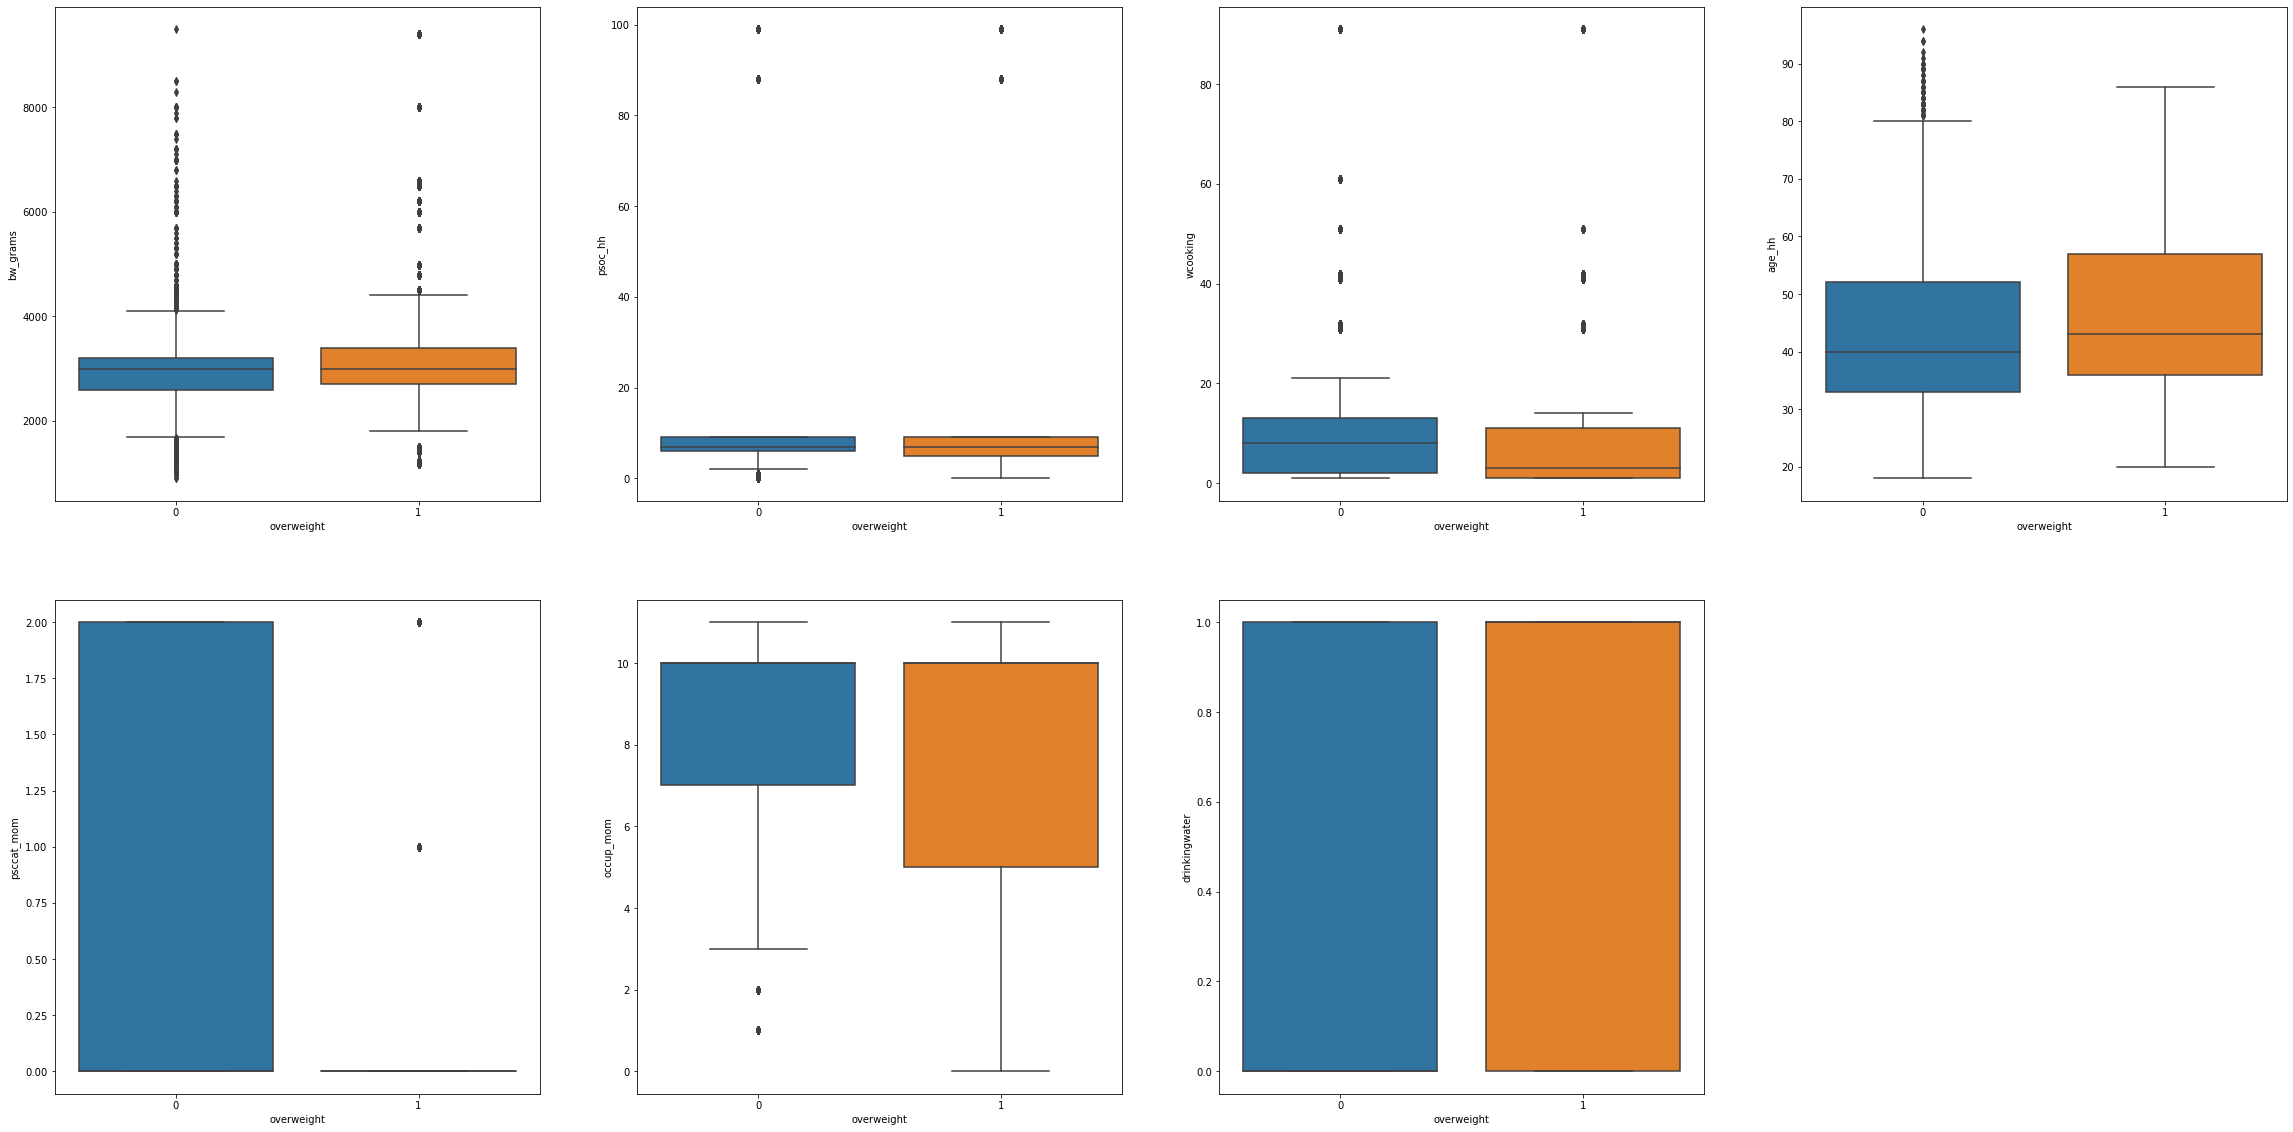

In [185]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [186]:
lr,ur=outlier(df_upsampled6['bw_grams'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    13589
0    13148
dtype: int64

In [187]:
lr,ur=outlier(df_upsampled6['bw_grams'][df_upsampled6.overweight==1])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams > ur) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams < lr) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
0    13148
1    12998
dtype: int64

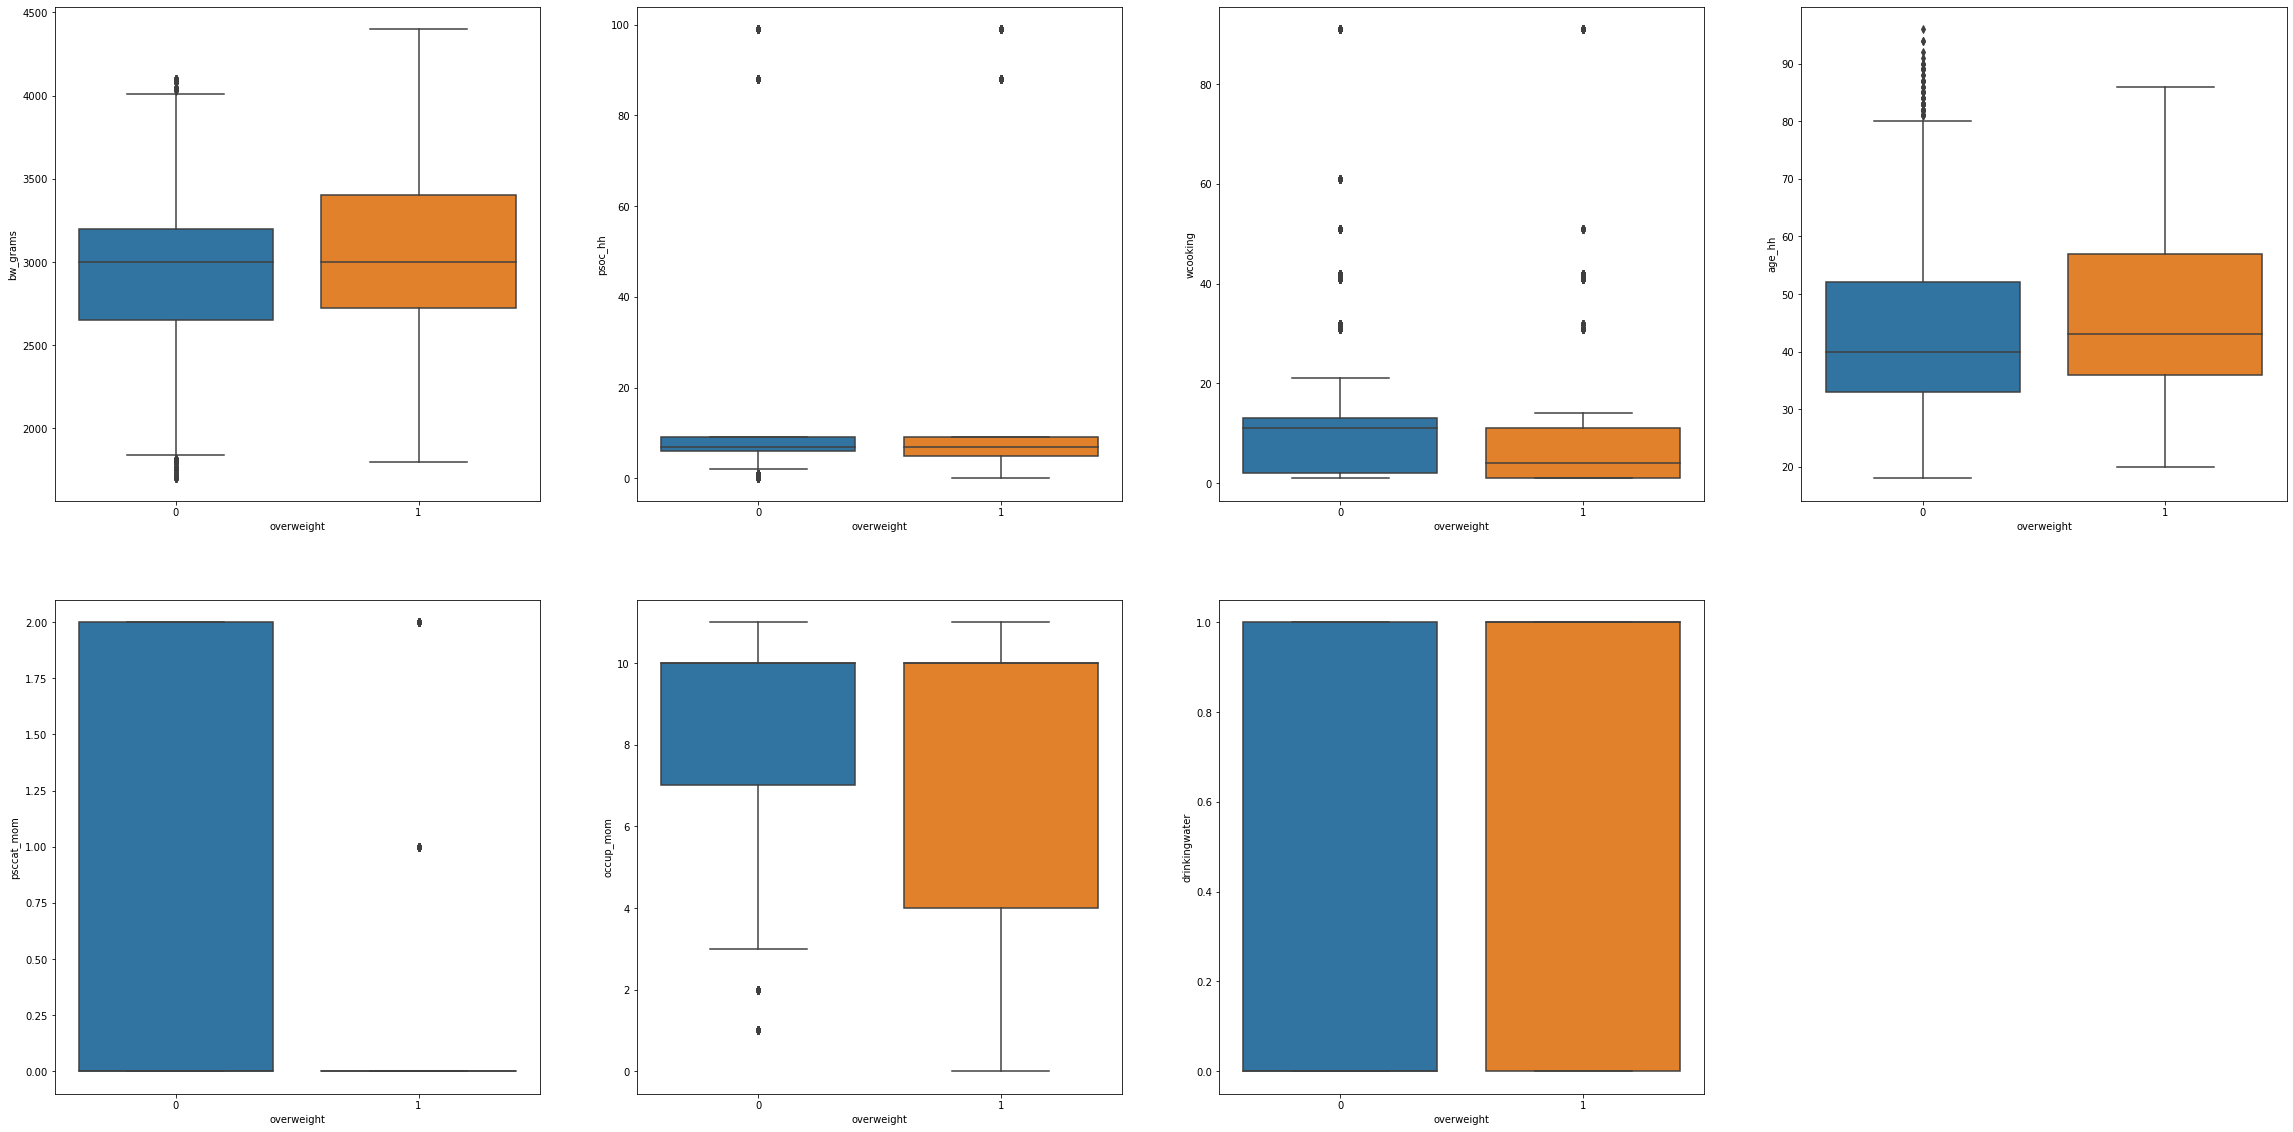

In [188]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [189]:
lr,ur=outlier(df_upsampled6['bw_grams'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
0    13012
1    12998
dtype: int64

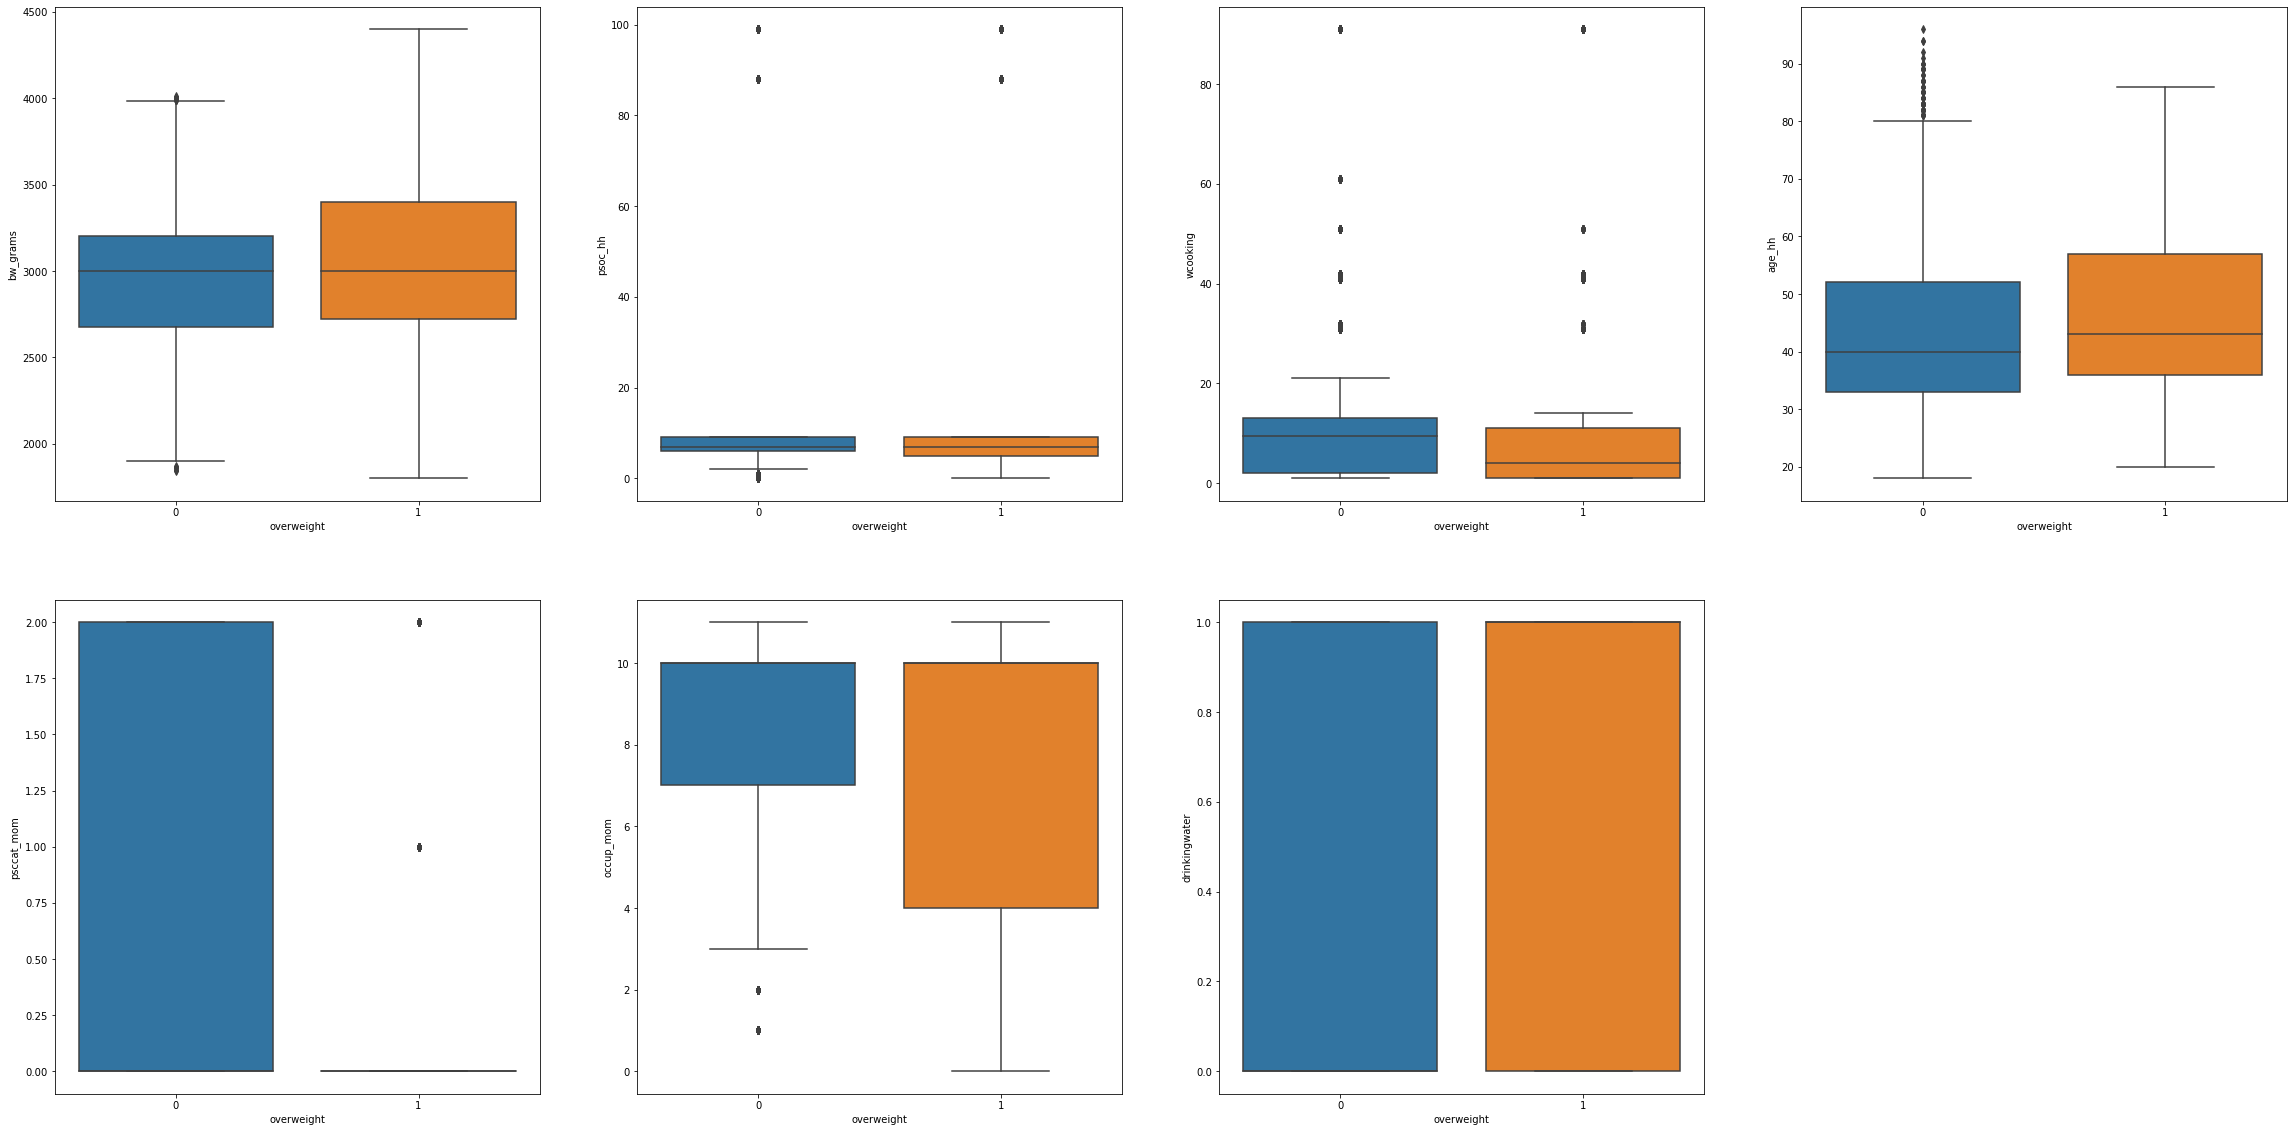

In [190]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [191]:
lr,ur=outlier(df_upsampled6['bw_grams'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.bw_grams < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    12998
0    12845
dtype: int64

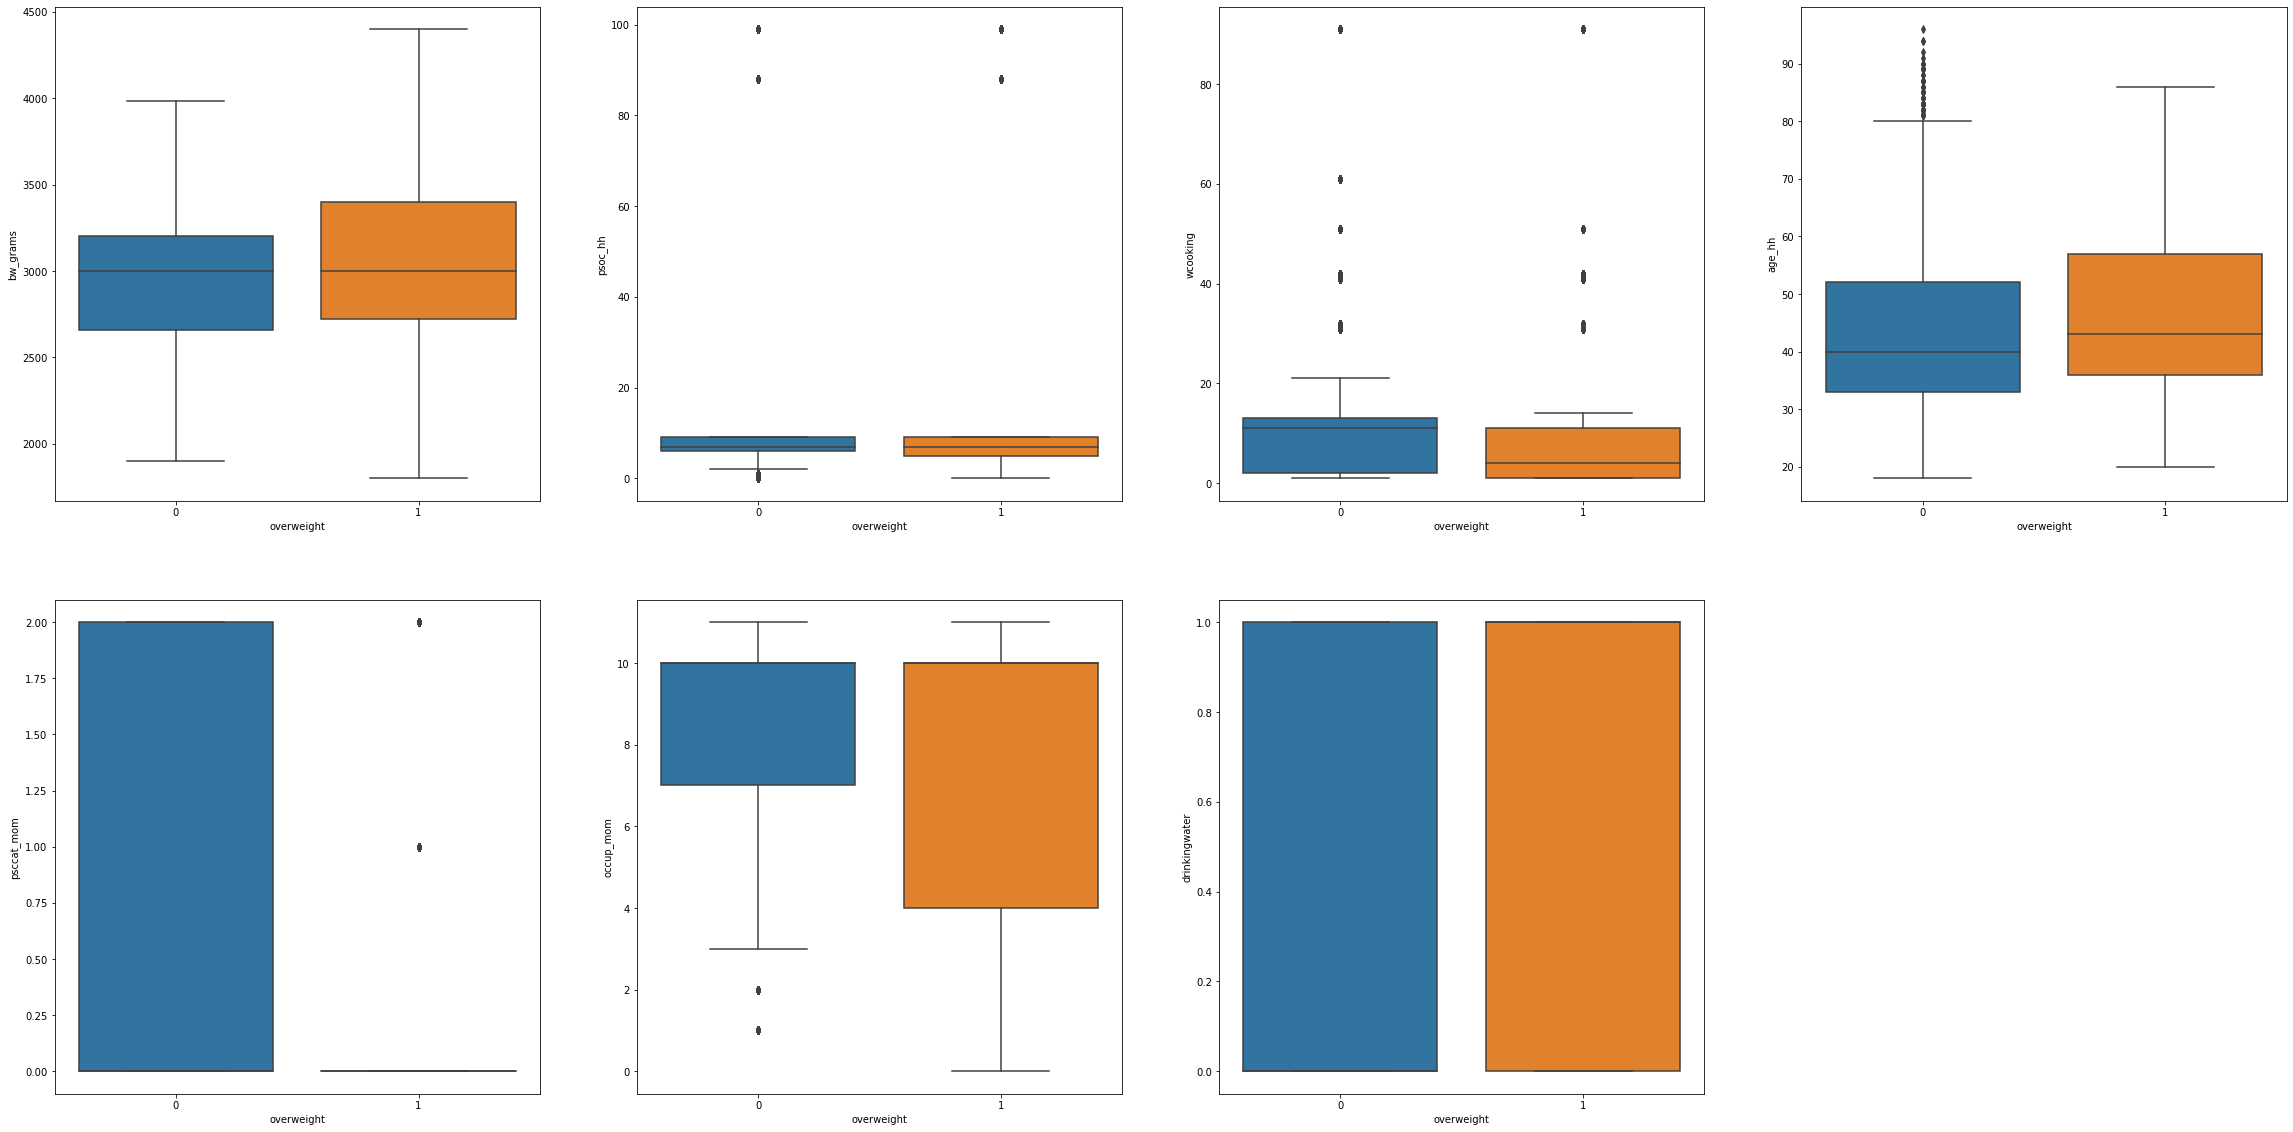

In [192]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [193]:
lr,ur=outlier(df_upsampled6['psoc_hh'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.psoc_hh > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.psoc_hh < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    12998
0    10772
dtype: int64

In [194]:
lr,ur=outlier(df_upsampled6['psoc_hh'][df_upsampled6.overweight==1])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.psoc_hh > ur) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.psoc_hh < lr) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
0    10772
1    10490
dtype: int64

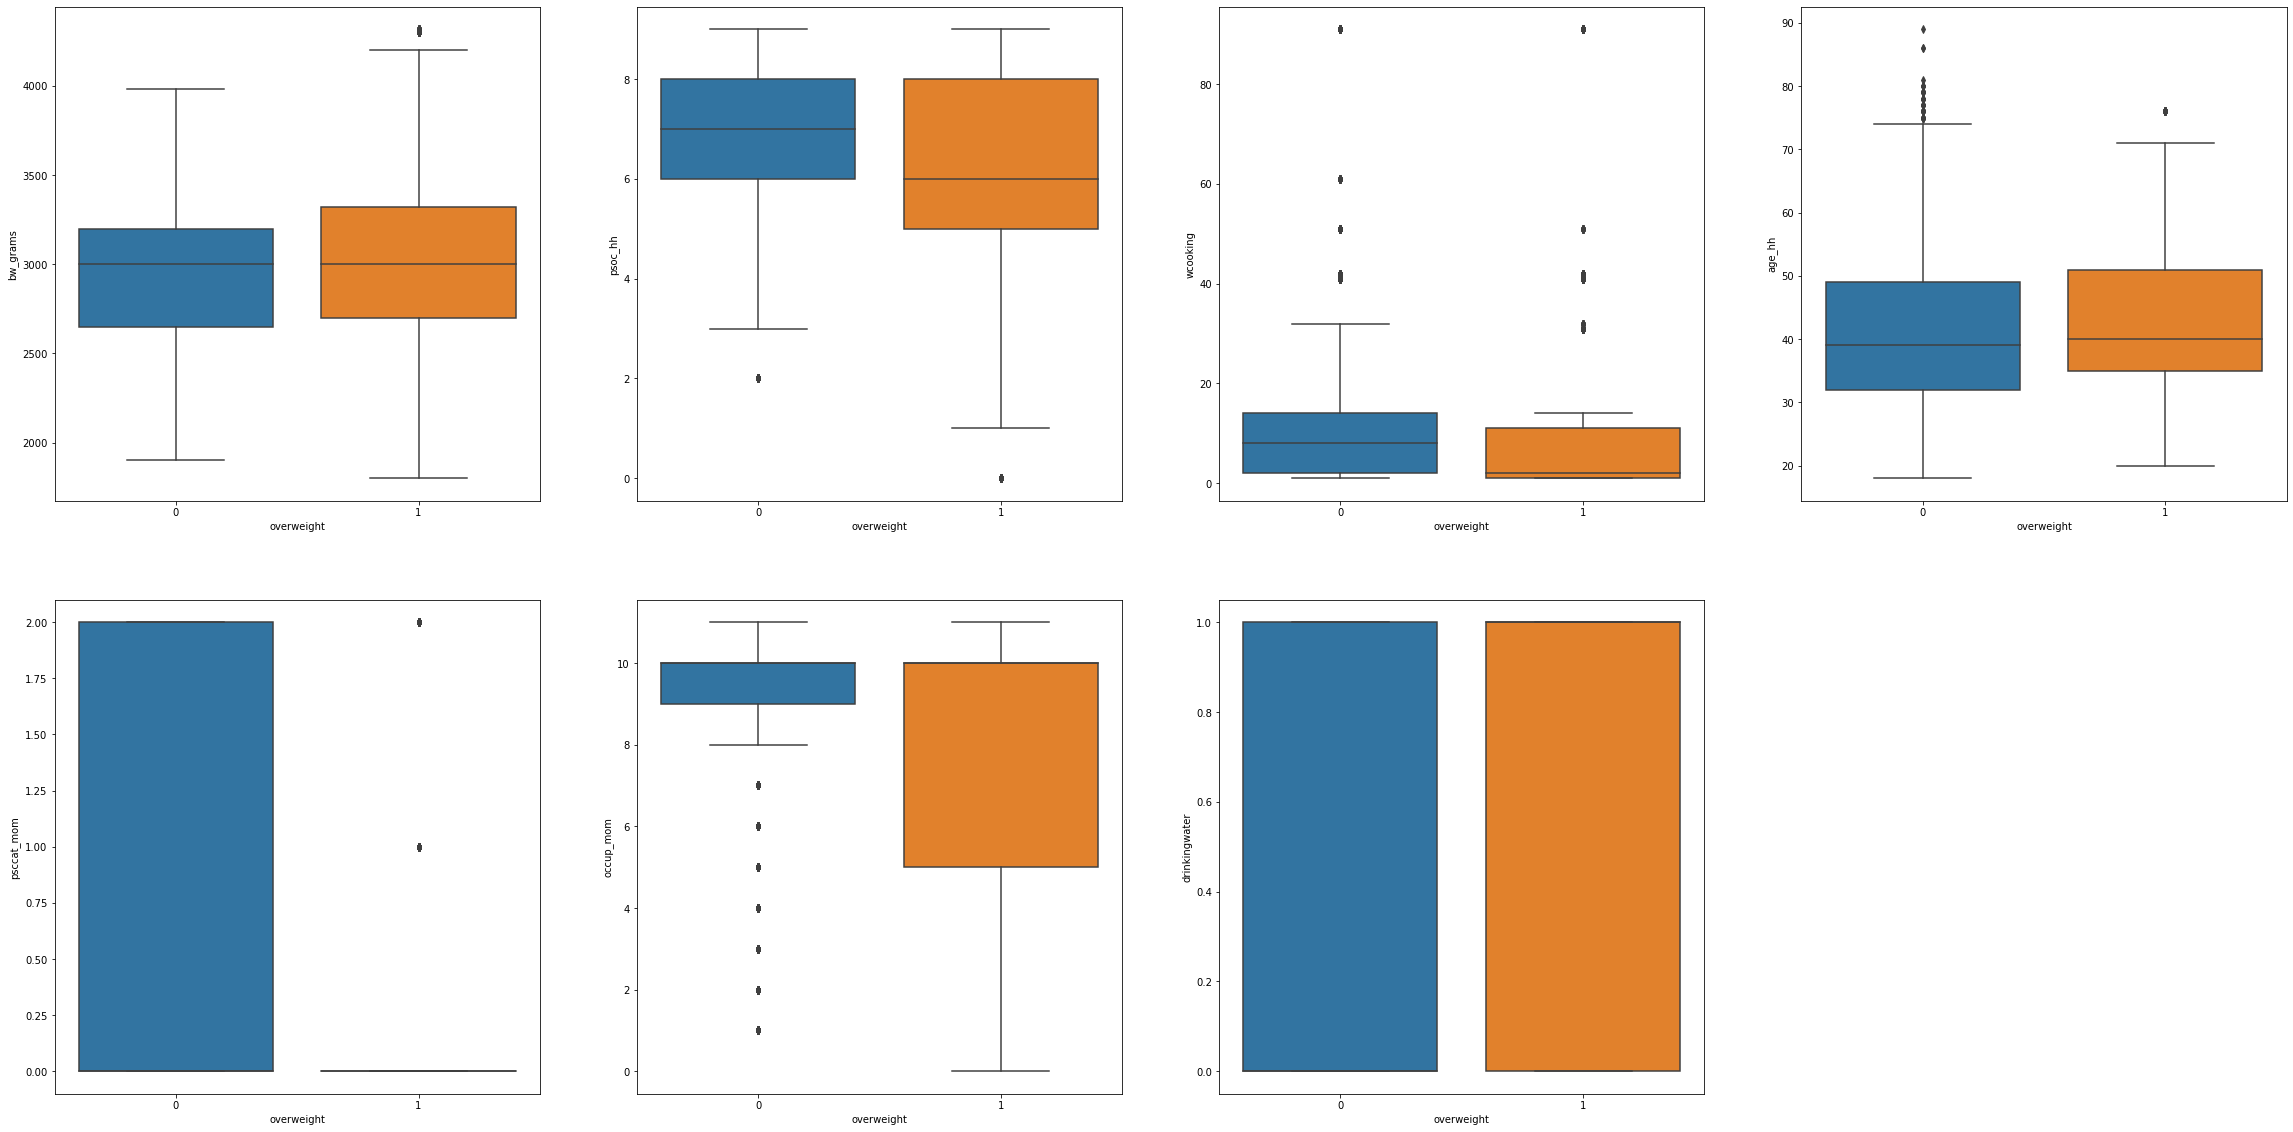

In [195]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [196]:
lr,ur=outlier(df_upsampled6['wcooking'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    10490
0     9436
dtype: int64

In [197]:
lr,ur=outlier(df_upsampled6['wcooking'][df_upsampled6.overweight==1])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking > ur) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking < lr) & (df_upsampled6.overweight == 1)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    9512
0    9436
dtype: int64

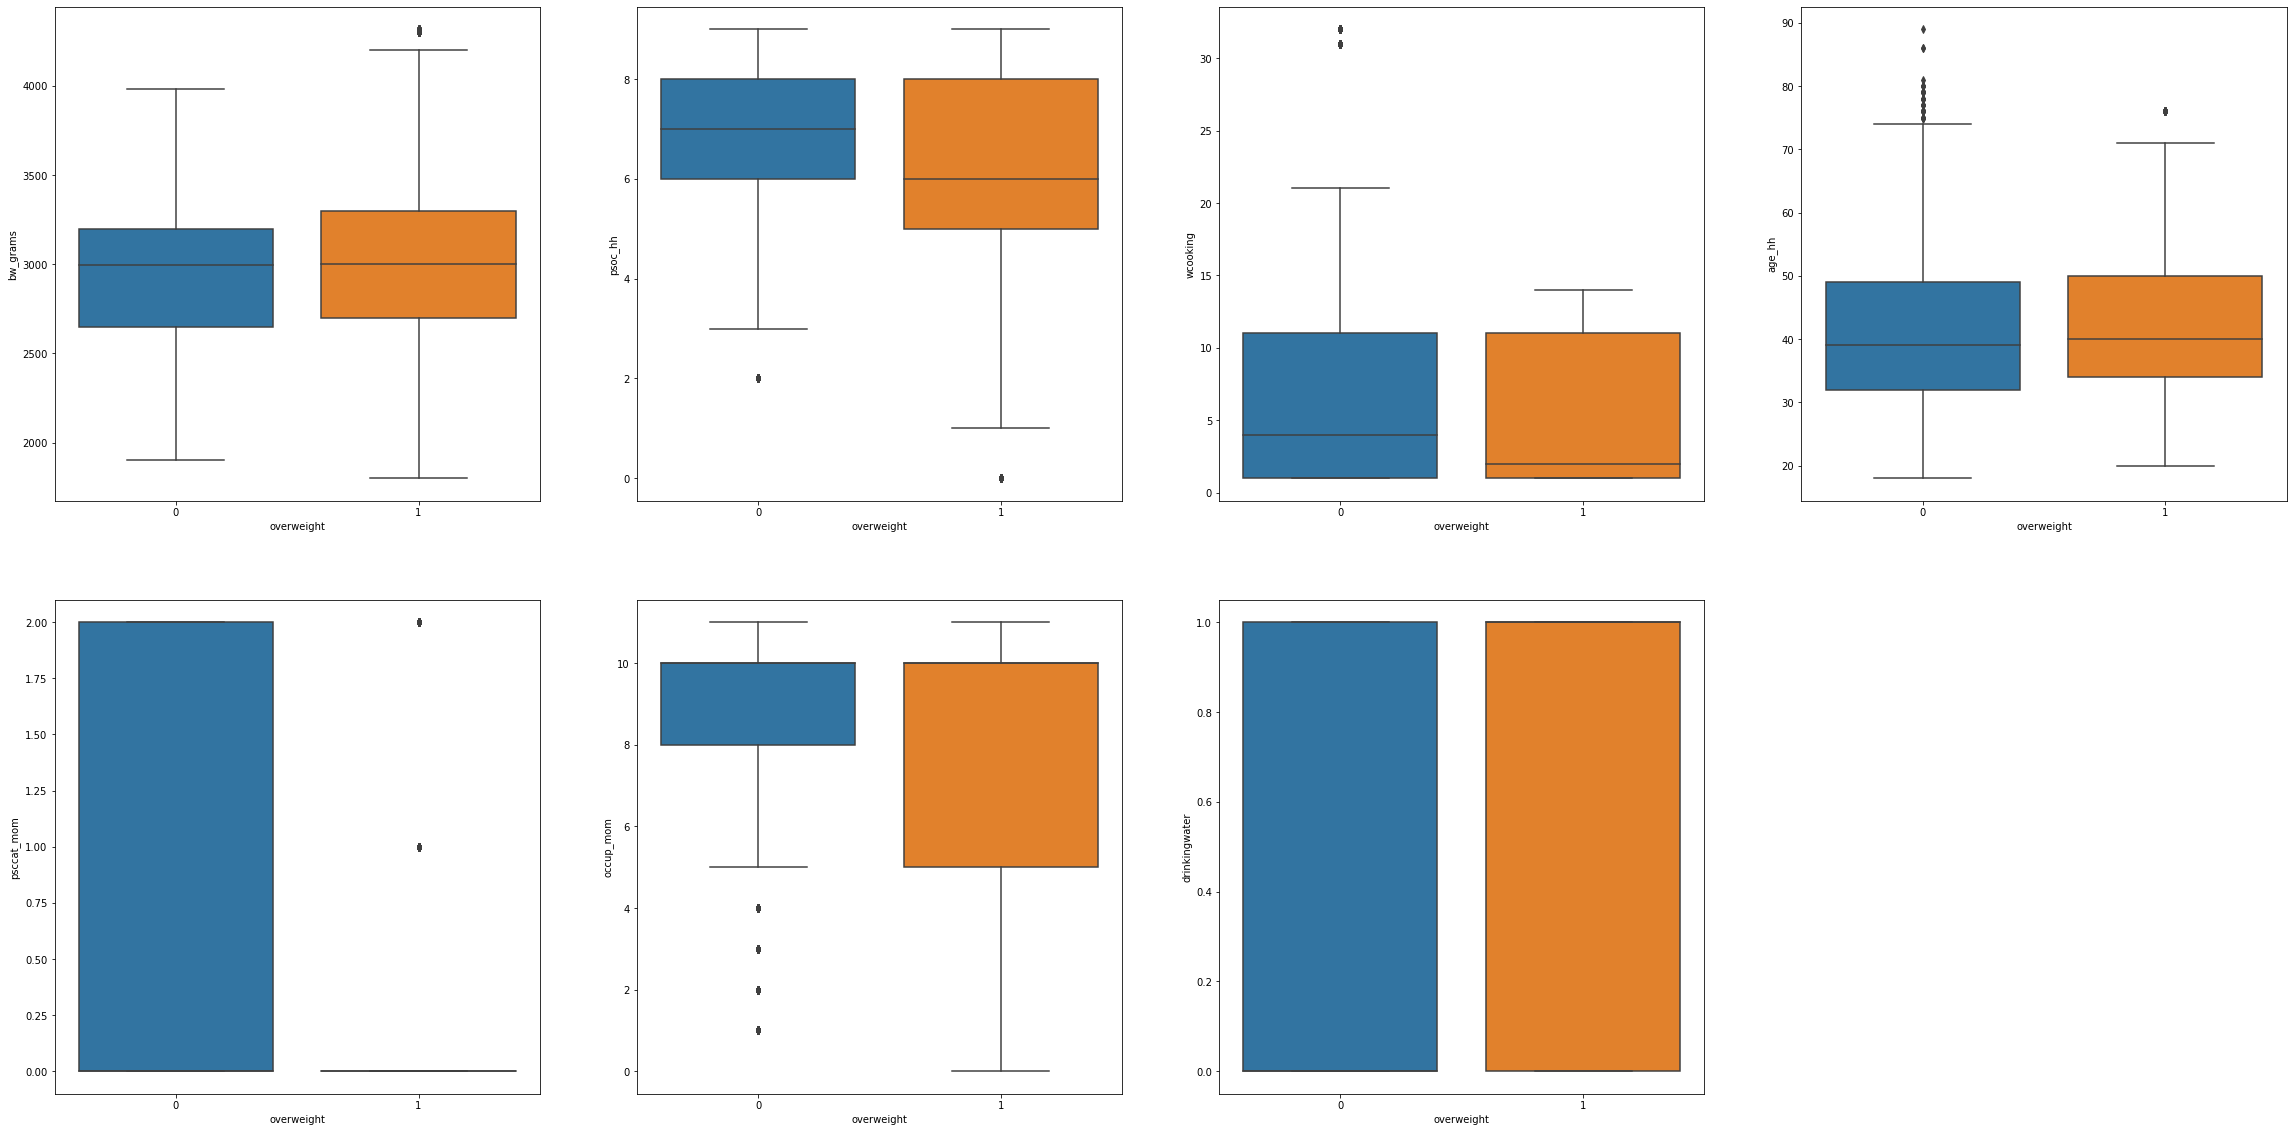

In [198]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [199]:
lr,ur=outlier(df_upsampled6['wcooking'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.wcooking < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    9512
0    9064
dtype: int64

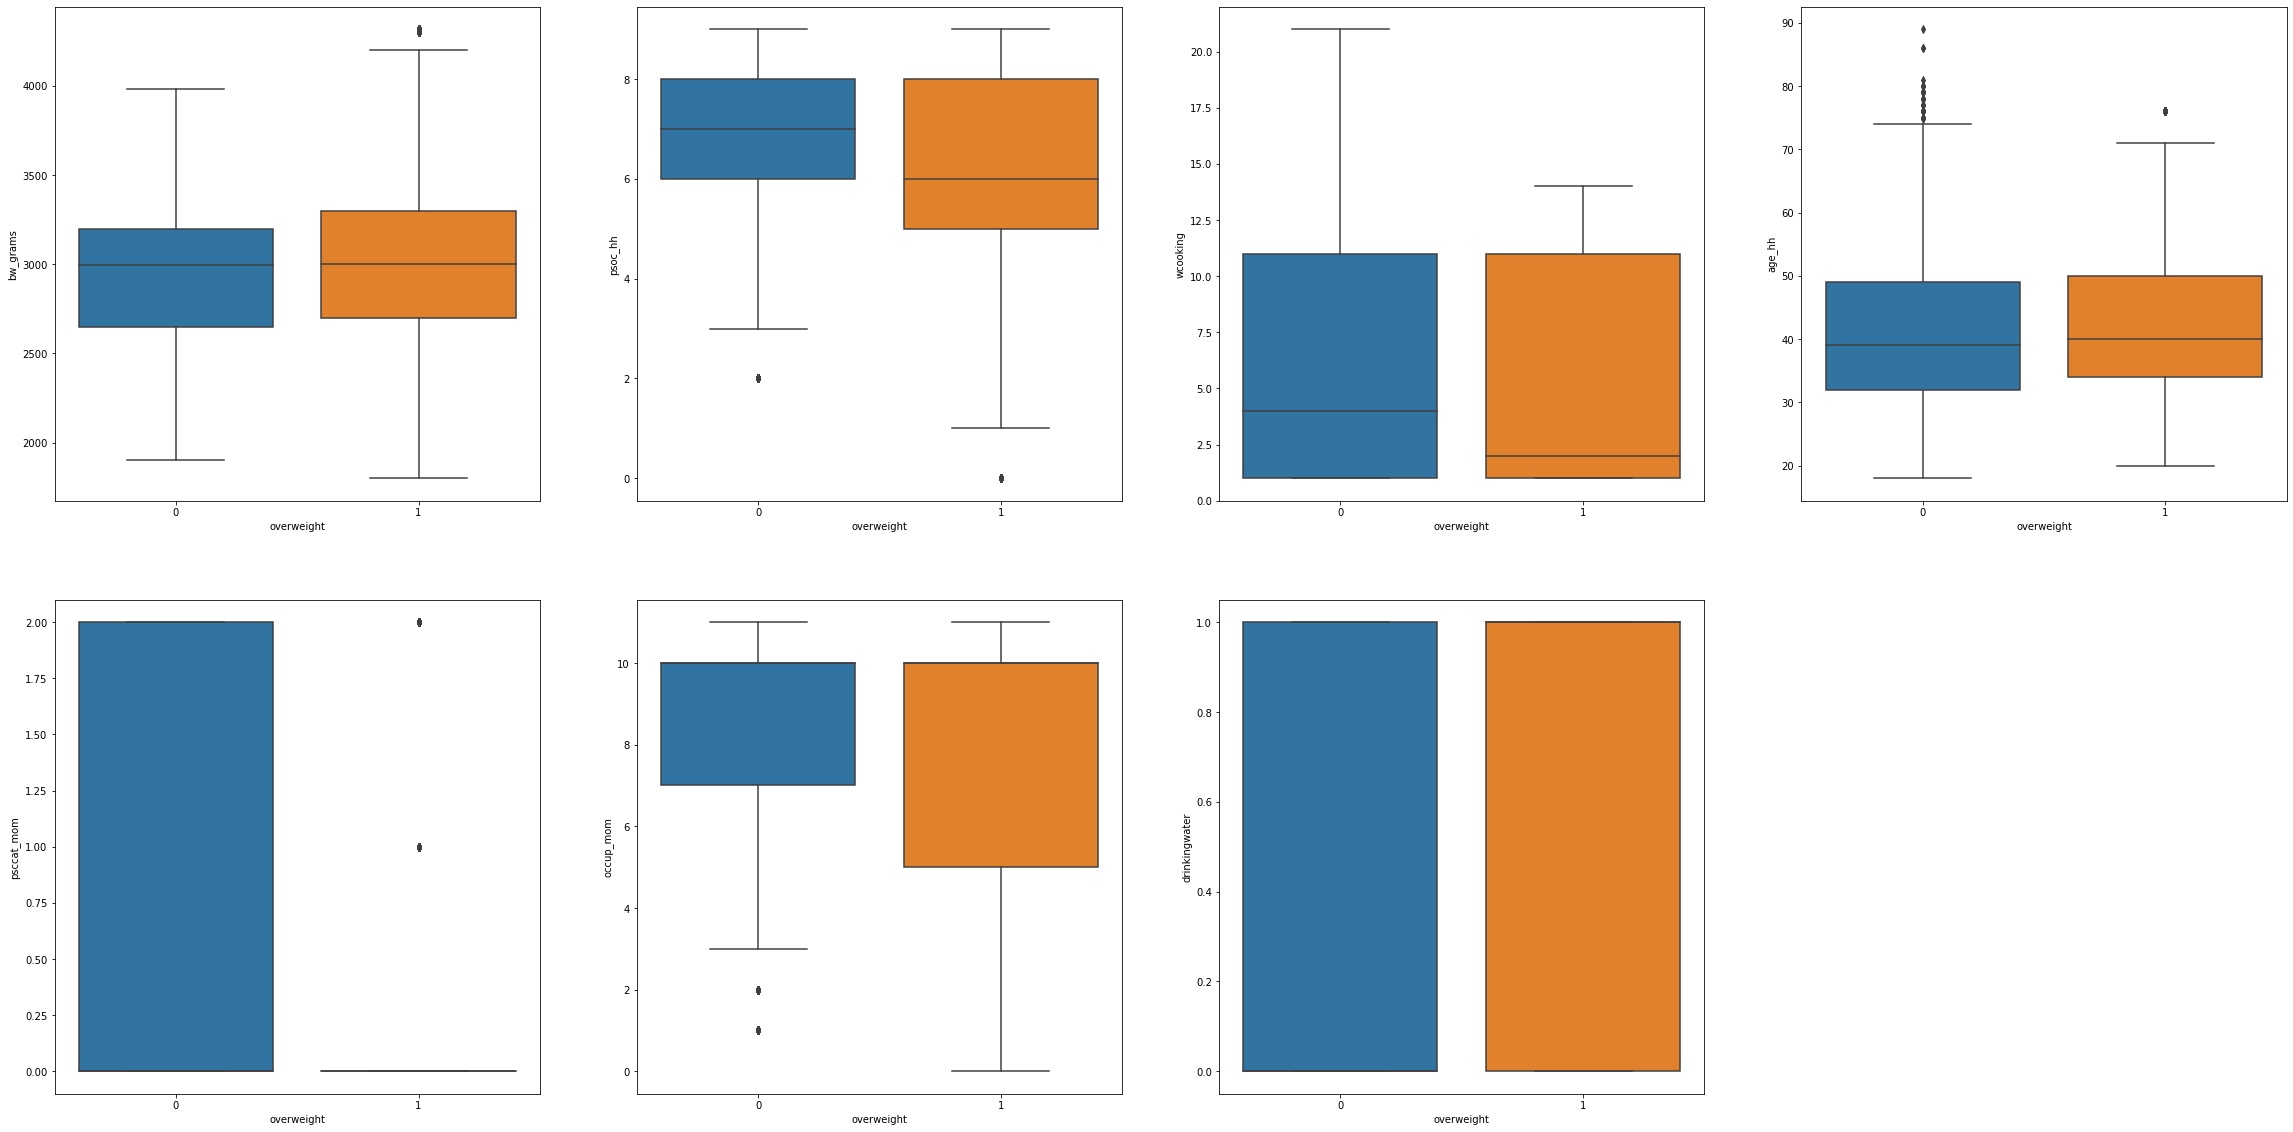

In [200]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [201]:
lr,ur=outlier(df_upsampled6['age_hh'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.age_hh > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.age_hh < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    9512
0    9021
dtype: int64

In [202]:
lr,ur=outlier(df_upsampled6['age_hh'][df_upsampled6.overweight==0])
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.age_hh > ur) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.drop(df_upsampled6.index[(df_upsampled6.age_hh < lr) & (df_upsampled6.overweight == 0)],inplace=True)
df_upsampled6.value_counts('overweight')

overweight
1    9512
0    9021
dtype: int64

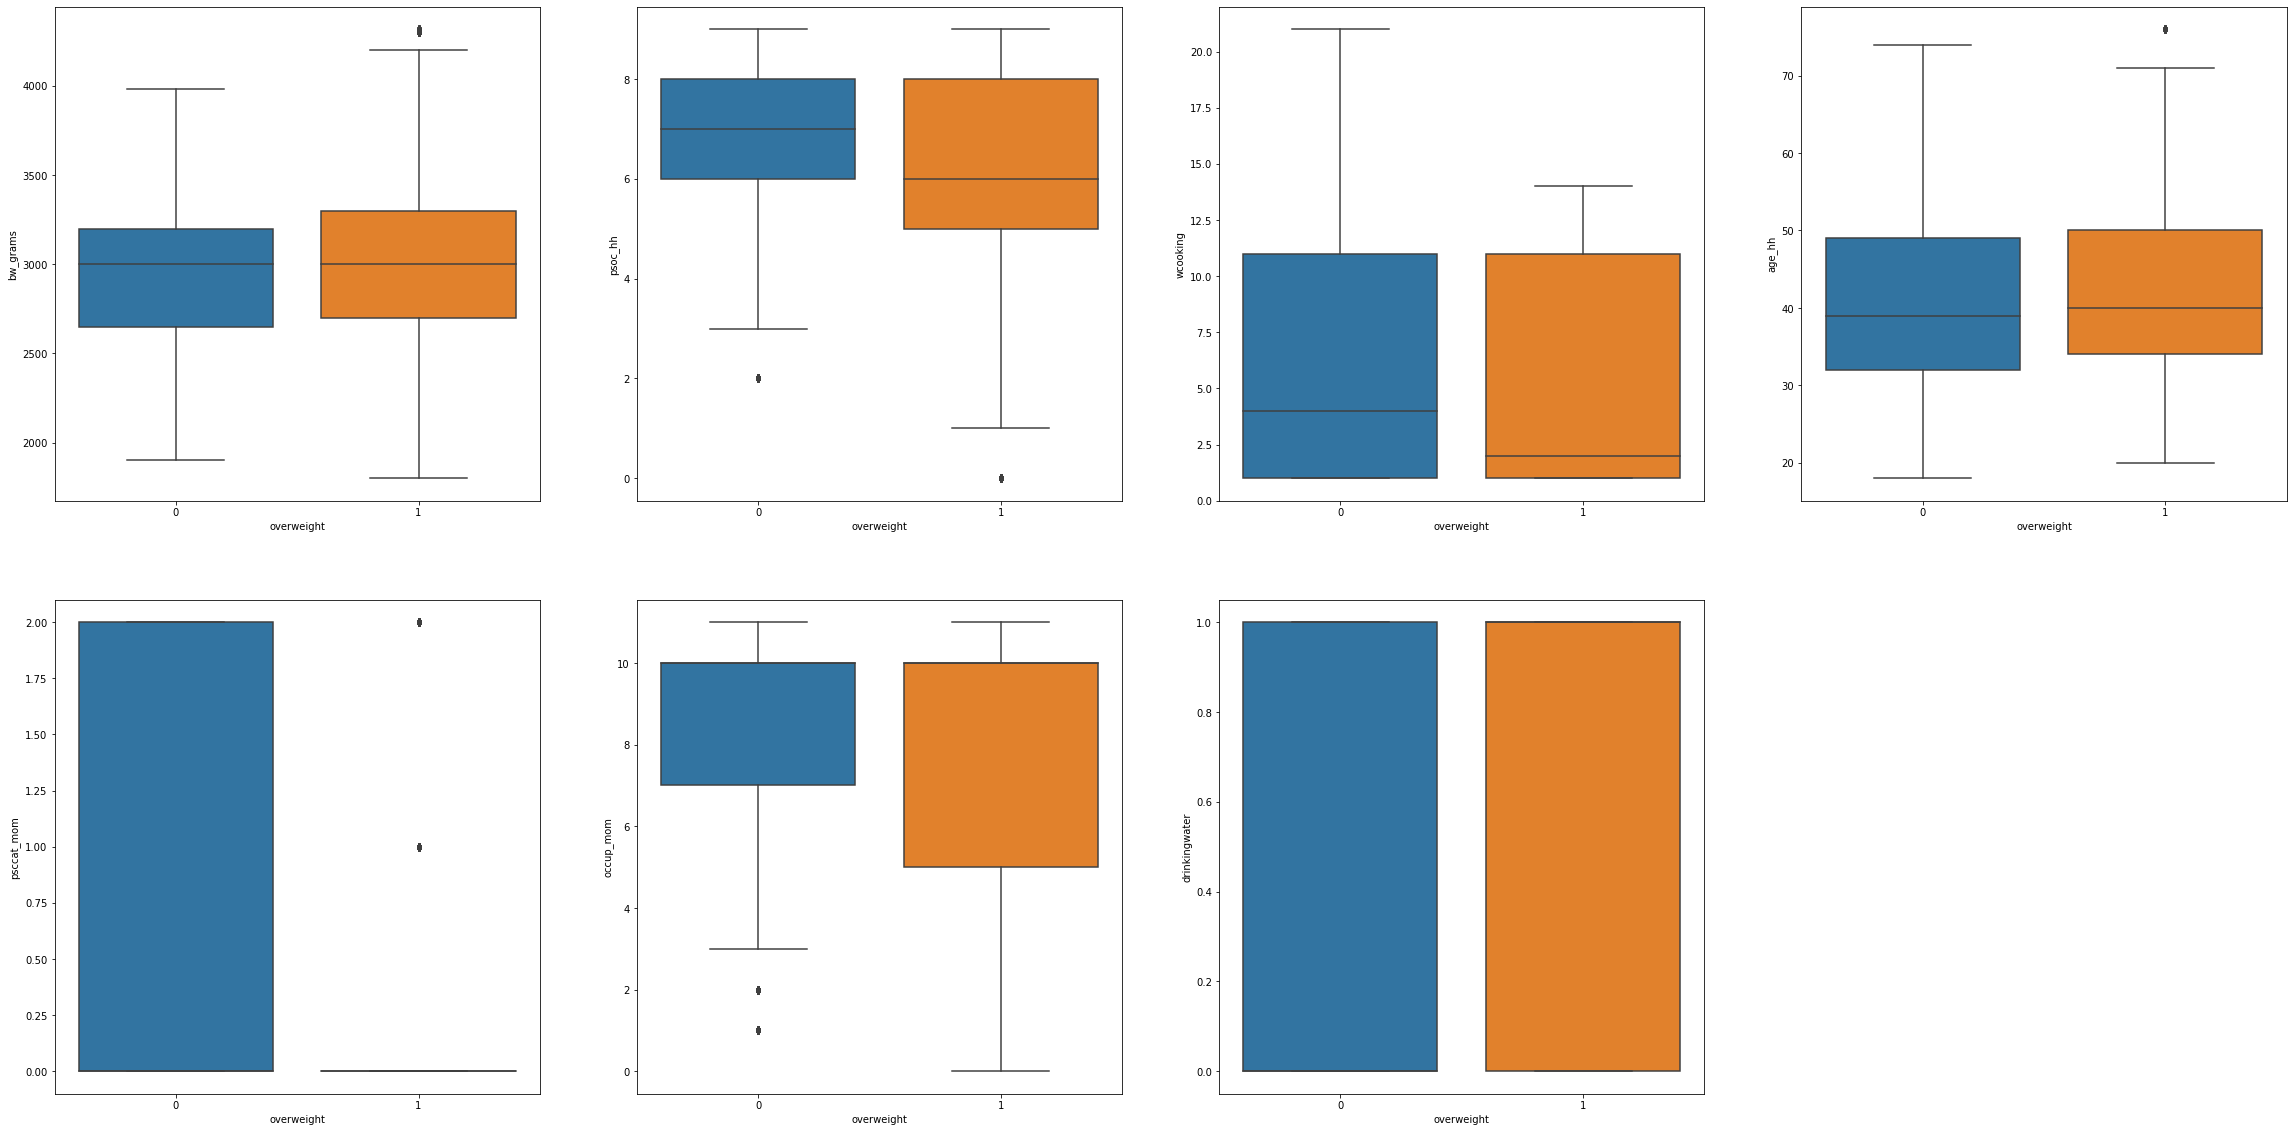

In [203]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="overweight", y=y, data=df_upsampled6)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')
  
plt.subplot(2,4,4)
graph('age_hh')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('occup_mom')
  
plt.subplot(2,4,7)
graph('drinkingwater')
plt.show()

In [284]:
Final6 = df_upsampled6[["bw_grams","psoc_hh","wcooking","age_hh"]]
Target6 =df_upsampled6['overweight']

In [285]:
df_upsampled6['overweight'].value_counts()

1    9512
0    9021
Name: overweight, dtype: int64

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final6,Target6,test_size = 0.2, random_state=42)

In [287]:
X_train.head()

,bw_grams,psoc_hh,wcooking,age_hh
5077,3500,6,4,57
8256,3000,5,11,36
2305,2800,9,2,31
11509,2200,2,11,40
9578,2600,5,12,34


In [288]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.592
Accuracy score : 0.5934718100890207


In [289]:
X_train

,bw_grams,psoc_hh,wcooking,age_hh
5077,3500,6,4,57
8256,3000,5,11,36
2305,2800,9,2,31
11509,2200,2,11,40
9578,2600,5,12,34
...,...,...,...,...
2448,2500,8,1,51
12871,3700,6,14,56
7247,3500,6,4,25
1114,2800,9,1,49


In [290]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)
rf =accuracy_score(rf_pred,y_test)

Training score: 0.994
Accuracy score:  0.9870515241435123


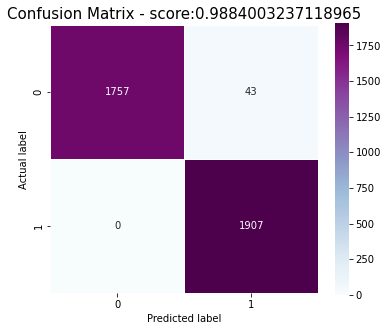

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1800
           1       0.98      1.00      0.99      1907

    accuracy                           0.99      3707
   macro avg       0.99      0.99      0.99      3707
weighted avg       0.99      0.99      0.99      3707



In [291]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [292]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)
print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.991
Test score: 0.981


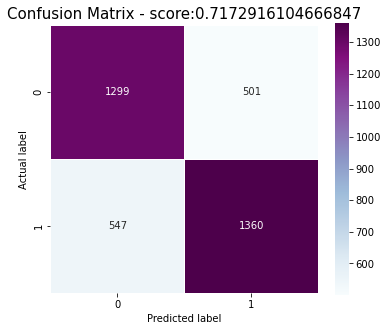

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1800
           1       0.73      0.71      0.72      1907

    accuracy                           0.72      3707
   macro avg       0.72      0.72      0.72      3707
weighted avg       0.72      0.72      0.72      3707



In [293]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

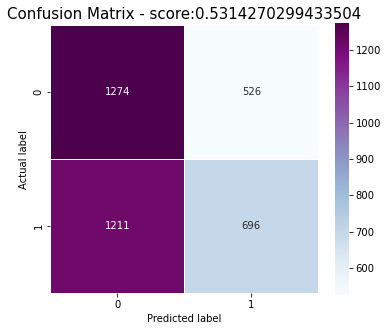

              precision    recall  f1-score   support

           0       0.51      0.71      0.59      1800
           1       0.57      0.36      0.44      1907

    accuracy                           0.53      3707
   macro avg       0.54      0.54      0.52      3707
weighted avg       0.54      0.53      0.52      3707



In [294]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


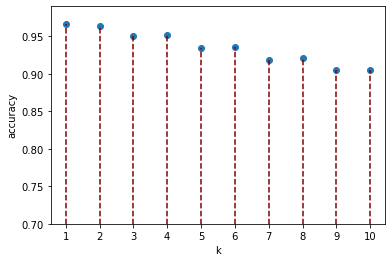

In [295]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

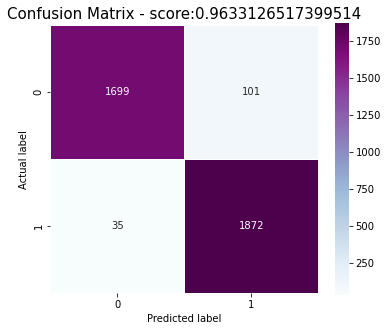

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1800
           1       0.95      0.98      0.96      1907

    accuracy                           0.96      3707
   macro avg       0.96      0.96      0.96      3707
weighted avg       0.96      0.96      0.96      3707



In [296]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [297]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.943342776203966
Testing accuracy =  0.9322902616671163


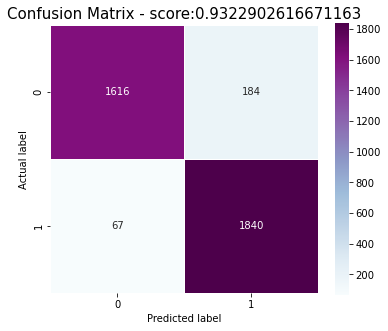

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1800
           1       0.91      0.96      0.94      1907

    accuracy                           0.93      3707
   macro avg       0.93      0.93      0.93      3707
weighted avg       0.93      0.93      0.93      3707



0.9322902616671163

In [298]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [299]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.6176311884527182
Testing accuracy =  0.6180199622336121


0.6180199622336121

In [300]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.632276262891103 0.996073967255142 0.9971437103070558 0.9971437103070558 0.9811980714327334 0.6492706694633805


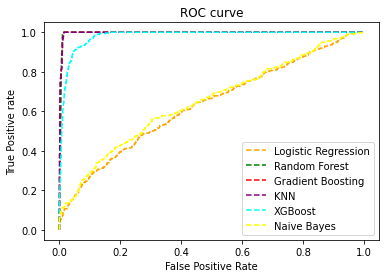

In [301]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [302]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Extreme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf,gbr_acc,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [303]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.593472
1,Random Forest Classifier,0.987052
2,Gradient Boosting Classifier,0.717292
3,SVC,0.531427
4,KNierest Neighbor,0.963313
5,Extreme Gradient Boosting,0.932290
6,Naive Bayes Classifier,0.618020


In [304]:
rf_pred = r_pred.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(rf_pred,y_test))

Accuracy Score of Random Forest: 0.9870515241435123


In [305]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': rf_pred, 'Difference': y_test-rf_pred})
output.head(10)

,Real_class,Predicted_class,Difference
4447,1,1,0
4747,0,0,0
11509,1,1,0
12128,0,1,-1
13425,0,0,0
7310,1,1,0
3300,0,0,0
4287,1,1,0
7073,1,1,0
11732,0,0,0


In [306]:
y_test.head()

4447     1
4747     0
11509    1
12128    0
13425    0
Name: overweight, dtype: int64

In [307]:
X_test.head()

,bw_grams,psoc_hh,wcooking,age_hh
4447,3000,9,1,43
4747,2500,5,1,40
11509,2200,2,11,40
12128,2800,5,11,37
13425,3084,7,14,59


In [316]:
r_pred.predict([[2200,2,11,40]])

C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [311]:
y_test

4447     1
4747     0
11509    1
12128    0
13425    0
        ..
5739     1
4495     1
4282     0
14353    0
1475     0
Name: overweight, Length: 3707, dtype: int64

In [312]:
import pickle
with open('overweight_59mos_rf.pkl','wb') as file:
    pickle.dump(r_pred,file)
X_test.to_csv("X_test_overweight.csv")
y_test.to_csv("y_test_overweight.csv")

In [313]:
X_test.head()

,bw_grams,psoc_hh,wcooking,age_hh
4447,3000,9,1,43
4747,2500,5,1,40
11509,2200,2,11,40
12128,2800,5,11,37
13425,3084,7,14,59
